In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_process import ArmaProcess
from causalimpact import CausalImpact

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
np.random.seed(12345)
ar = np.r_[1, 0.9]
ma = np.array([1])

ar, ma

(array([1. , 0.9]), array([1]))

In [3]:
arma_process = ArmaProcess(ar, ma)
X = 100 + arma_process.generate_sample(nsample=100)
y = 1.2 * X + np.random.normal(size=100)
y[70:] += 5

X, y

(array([ 99.79529234, 100.66318023,  98.88369908, 100.44894053,
        101.5617341 ,  99.98784514, 100.10384725, 100.18828363,
        100.5995673 , 100.70682417, 100.37104761,  98.36983604,
        101.74213919,  98.6609876 , 102.55802799,  98.58420415,
         99.27257896, 100.2828364 , 101.41447255,  98.28840497,
        101.00069408,  99.57636034, 103.63021962,  95.71157482,
        103.28249536,  97.16987545, 102.84972565,  97.95901898,
        101.8378232 ,  99.68976892,  99.56566399,  99.55974887,
         98.02599436,  99.91584429,  99.21498274, 101.26666082,
         97.59407077, 102.28516343,  96.87984046, 103.1410263 ,
         94.81365752, 104.46816527,  94.43665573, 104.03627394,
         95.06032321, 104.73205886,  96.11913114, 102.73889544,
         97.86627975, 103.27009044,  97.1267953 , 102.83255834,
         97.43883589, 103.30985929,  98.34832125, 100.56724932,
         97.94036918, 101.87585234,  99.07009604, 100.17638924,
        100.70382977,  99.3565213 , 100.

In [4]:
data = pd.DataFrame({'y': y, 'X': X}, columns=['y', 'X'])
pre_period = [0, 69]
post_period = [70, 99]

data.head()

,y,X
0,118.188694,99.795292
1,120.233276,100.663180
2,118.627775,98.883699
3,119.609722,100.448941
4,121.391508,101.561734


Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    125.23             3756.86
Prediction (s.d.)         120.39 (0.27)      3611.81 (8.04)
95% CI                    [119.88, 120.93]   [3596.28, 3627.8]

Absolute effect (s.d.)    4.84 (0.27)        145.06 (8.04)
95% CI                    [4.3, 5.35]        [129.06, 160.58]

Relative effect (s.d.)    4.02% (0.22%)      4.02% (0.22%)
95% CI                    [3.57%, 4.45%]     [3.57%, 4.45%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))
Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 125.23. By contrast, in the absence of an
intervention, we would have expected an average response of 120.39.
The 95% interval of this counterfactual prediction is [119.88, 120.93].
Subtracting this prediction from t

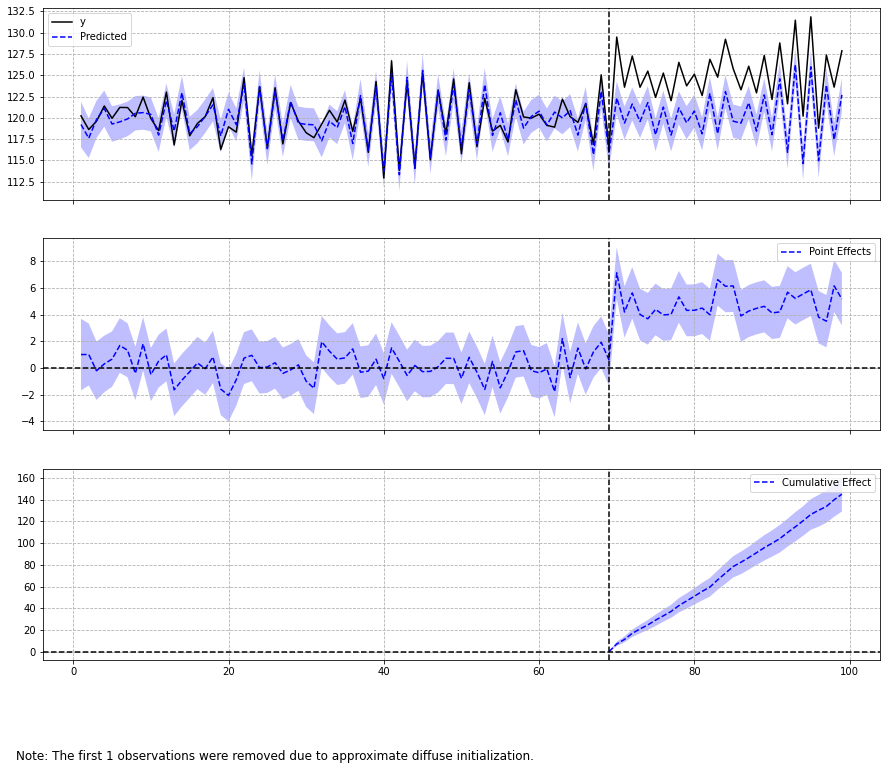

In [5]:
ci = CausalImpact(data, pre_period, post_period)
print(ci.summary())
print(ci.summary(output='report'))
ci.plot()

---

In [6]:
import pandas as pd

In [16]:
data = pd.read_csv('sample_causal_impact.csv')
data.head()

,TransactionID,Price
0,0,899
1,1,499
2,2,500
3,3,499
4,4,125


In [17]:
data = data[['Price', 'TransactionID']]

In [18]:
n = len(data)
n

548863

In [21]:
pre_period = [0, n-100000]
post_period = [n-99999, n-1]

pre_period, post_period

([0, 448863], [448864, 548862])

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    1992.03            199200773.0
Prediction (s.d.)         1996.33 (11019.71) 199630863.58 (1101959825.07)
95% CI                    [-19754.35, 23442.11][-1975415304.59, 2344187834.5]

Absolute effect (s.d.)    -4.3 (11019.71)    -430090.58 (1101959825.07)
95% CI                    [-21450.09, 21746.38][-2144987061.5, 2174616077.59]

Relative effect (s.d.)    -0.22% (552.0%)    -0.22% (552.0%)
95% CI                    [-1074.48%, 1089.32%][-1074.48%, 1089.32%]

Posterior tail-area probability p: 0.49
Posterior prob. of a causal effect: 51.25%

For more details run the command: print(impact.summary('report'))
Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 1992.03. In the absence of an
intervention, we would have expected an average response of 1996.33.
The 95% interval of this counterfactual pre

C:\Continuum\Anaconda3\envs\modfin\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


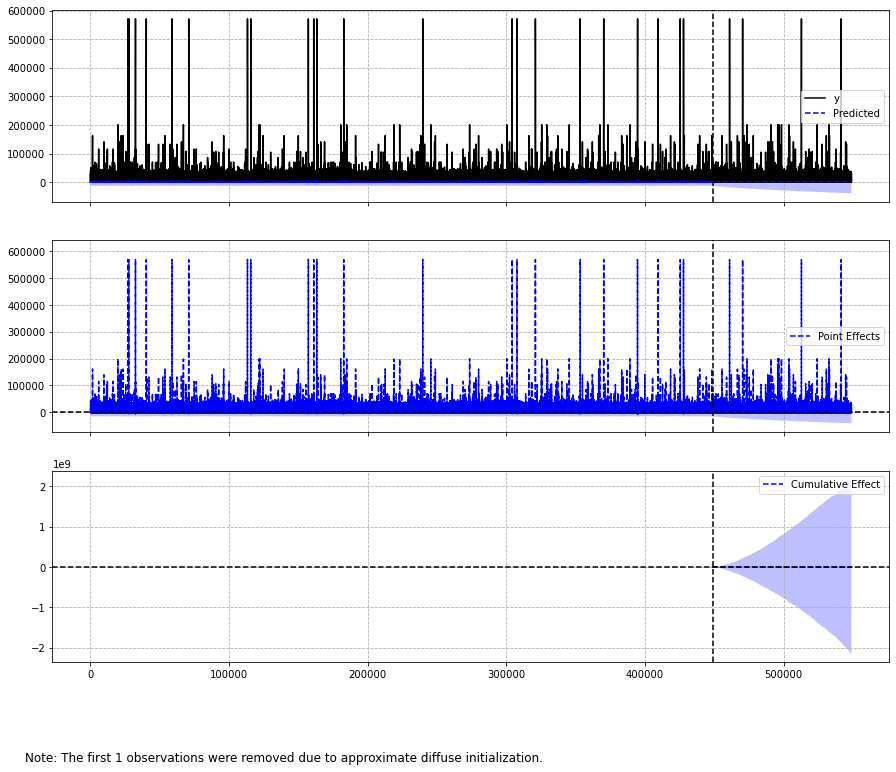

In [22]:
ci = CausalImpact(data, pre_period, post_period)

print(ci.summary())
print(ci.summary(output='report'))

ci.plot()

In [24]:
print(ci.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 1992.03. In the absence of an
intervention, we would have expected an average response of 1996.33.
The 95% interval of this counterfactual prediction is [-19754.35, 23442.11].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -4.3 with a 95% interval of
[-21450.09, 21746.38]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 199200773.0.
Had the intervention not taken place, we would have expected
a sum of 199630863.58. The 95% interval of this prediction is [-1975415304.59, 2344187834.5].


The above results are given in terms of absolute numbers. In relative
terms, the

In [9]:
data = data.loc[:1000]
len(data)

1001

In [12]:
pre_period = [0, 900]
post_period = [901, 1000]

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    2117.9             211790.0
Prediction (s.d.)         1667.42 (728.58)   166741.98 (72858.28)
95% CI                    [227.61, 3083.6]   [22761.01, 308360.21]

Absolute effect (s.d.)    450.48 (728.58)    45048.02 (72858.28)
95% CI                    [-965.7, 1890.29]  [-96570.21, 189028.99]

Relative effect (s.d.)    27.02% (43.7%)     27.02% (43.7%)
95% CI                    [-57.92%, 113.37%] [-57.92%, 113.37%]

Posterior tail-area probability p: 0.26
Posterior prob. of a causal effect: 74.13%

For more details run the command: print(impact.summary('report'))
Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 2117.9. In the absence of an
intervention, we would have expected an average response of 1667.42.
The 95% interval of this counterfactual prediction is [227.61, 3083.6].
Subtracting this 

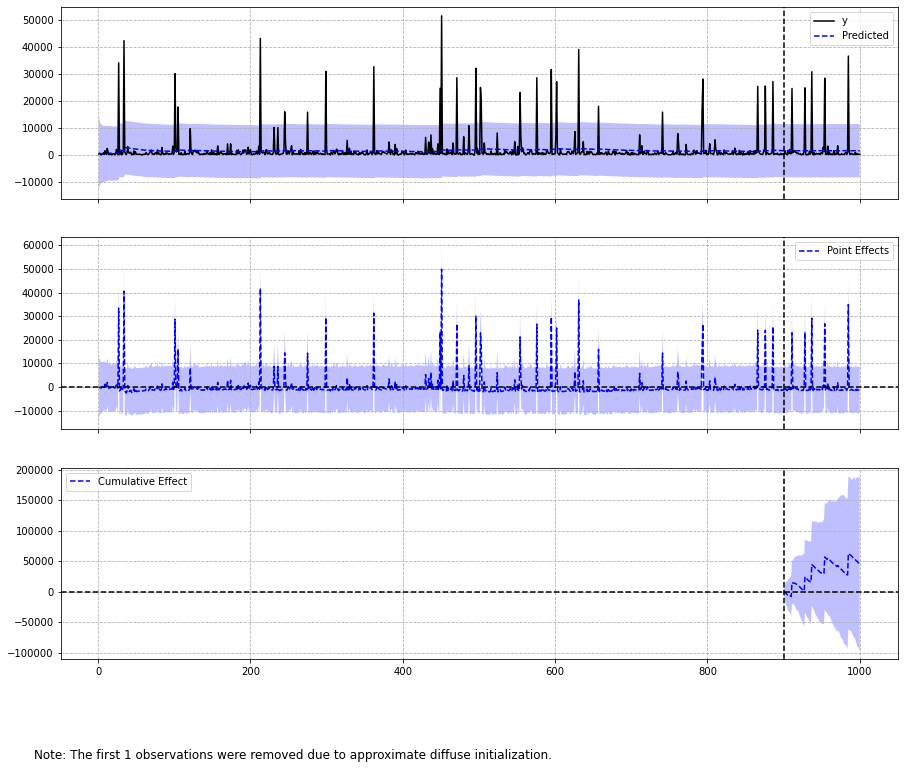

In [15]:
ci = CausalImpact(data, pre_period, post_period)

print(ci.summary())
print(ci.summary(output='report'))

ci.plot()